In [9]:
##Dependencies & Prep
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
import pyfolio as pf
%matplotlib inline
plt.style.use('ggplot')
yellow = (255/255, 222/255, 0/255)
navy = (0/255, 55/255, 104/255)


df = pd.read_excel('mifreturns.xlsx')
df['MIF'] = df.MIF.round(4)
df['SPX'] = df.SPX.round(4)
print(df.aum.iloc[-1])

365268.12


AttributeError: 'Series' object has no attribute 'avg'

In [12]:
##Value at Risk
vol = df.MIF.std()
mu = df.MIF.mean()

sim = []
for i in range (100):
    rand = np.random.normal(mu,vol,252)
    sim.append(rand)
var95 = np.percentile(sim,5)
#var95
mu
sharpe = (mu - .0432)/vol 
sharpe

-0.7776238512756981

There is a 5% chance that monthly returns of MIF portfolio will be -6.7%

In [ ]:
sharpe = .0432 + 

In [37]:
#Cumulative Returns
df['MIFcum'] = (((df.MIF + 1).cumprod() - 1) * 100).round(4)
df['SPXcum']=  (((df.SPX + 1).cumprod() - 1) * 100).round(4)
df.head()

,Date,MIF,SPX,aum,MIFcum,SPXcum
0,2018-01-31,0.0000,0.0000,NaN,0.0000,0.0000
1,2018-02-28,-0.0174,-0.0369,NaN,-1.7400,-3.6900
2,2018-03-31,-0.0149,-0.0254,NaN,-3.2041,-6.1363
3,2018-04-30,0.0039,0.0038,NaN,-2.8266,-5.7796
4,2018-05-31,0.0154,0.0241,NaN,-1.3301,-3.5089


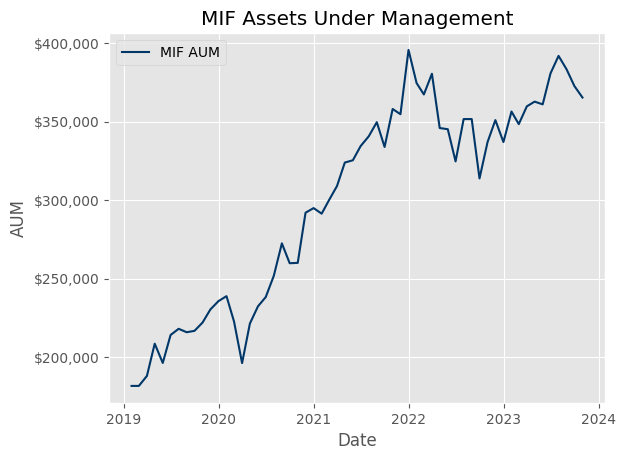

In [38]:

##Plotting AUM 
plt.plot(df.Date, df.aum, label = 'MIF AUM', color = navy)
plt.xlabel('Date')
plt.ylabel('AUM')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.title('MIF Assets Under Management')
plt.legend()
plt.show()

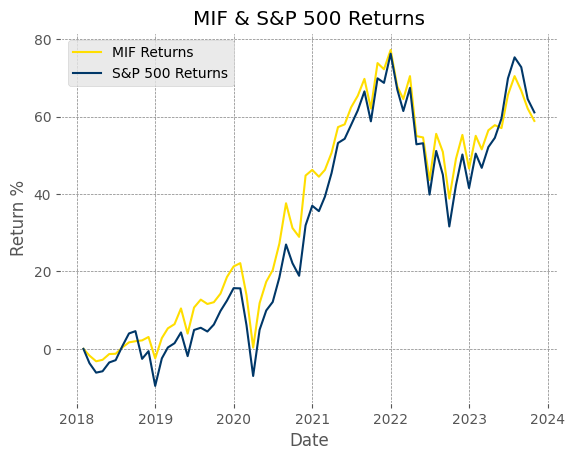

In [13]:
##Plotting Returns
plt.plot(df.Date,df.MIFcum, label = 'MIF Returns', color = yellow)
plt.plot(df.Date,df.SPXcum, label = "S&P 500 Returns", color = navy)
plt.xlabel('Date')
plt.ylabel('Return %')
plt.title('MIF & S&P 500 Returns')
plt.legend()
plt.gca().set_facecolor('white')
plt.grid(color = 'gray', linestyle= '--', linewidth= 0.5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

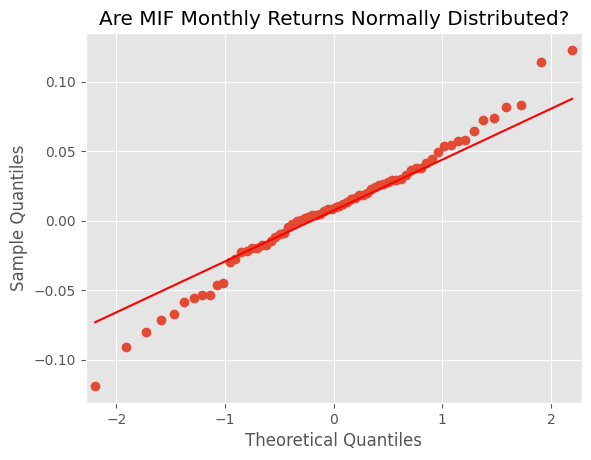

In [6]:

sm.qqplot(df.MIF,line ='q')
plt.title('Are MIF Monthly Returns Normally Distributed?')
plt.show


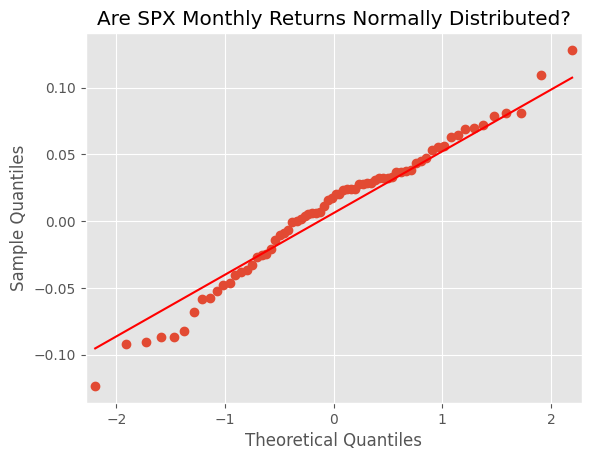

In [7]:
sm.qqplot(df.SPX, line= 'q')
plt.title('Are SPX Monthly Returns Normally Distributed?')
plt.show()


Lets assume they are. Both are slightly skewed but we will be performing a simulation on MIF returns, which are more normal than SPX returns

In [71]:

#df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
#df.set_index('Date', inplace= True)
#df.index = pd.to_datetime(df.Date)
#pf.create_full_tear_sheet(returns = df.MIF)


In [93]:
s = df.aum.iloc[-1]
def MCsim(period = 1, n_scenarios = 1000, mu = mu, vol = vol, sub_periods = 1, s = s):
    dt = 1/sub_periods
    n_steps = int(period*sub_periods)
    xi = np.random.normal(size=(n_steps, n_scenarios))

    rets = mu * dt + vol*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)

    values = s*(1+rets).cumprod()

    return values

<Axes: >

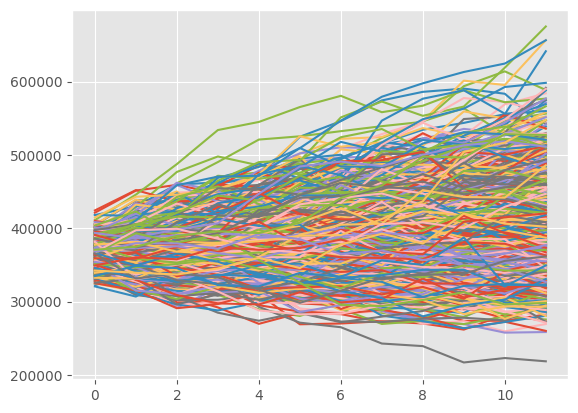

In [96]:
sim = MCsim(12)
sim
sim.plot(legend = False)

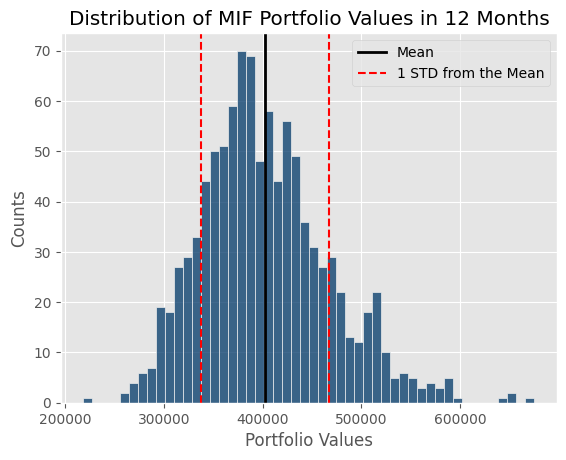

In [128]:
stdval = sim.iloc[-1].std()
meanval = sim.iloc[-1].mean()
ax = sns.histplot(data = sim.iloc[-1], bins = 50, color = navy)
ax.set_xlabel('Portfolio Values')
ax.set_ylabel('Counts')
ax.set(title = 'Distribution of MIF Portfolio Values in 12 Months')
ax.axvline(meanval, color = 'black', label = 'Mean', linewidth= 2)
ax.axvline(meanval + stdval, color = 'red', linestyle = '--', label = '1 STD from the Mean')
ax.axvline(meanval - stdval, color = 'red', linestyle = '--')
ax.legend()

In [100]:

stdval = sim.iloc[-1].std()
meanval = sim.iloc[-1].mean()

401979.72636674537

In [130]:
print(meanval + stdval)
print(meanval - stdval)

466917.2813643378
337042.17136915296
